In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

beauty_model = load_model("beauty_model.hdf5")

In [4]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras import Sequential, Model, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation




In [5]:
path = "SCUT-FBP5500_v2/train_test_files/split_of_60%training and 40%testing"
train_df = pd.read_csv("%s/train.txt" % (path), sep=" ", names=["image", "score"])
test_df = pd.read_csv("%s/test.txt" % (path), sep=" ", names=["image", "score"])



In [6]:
train_df['purpose'] = 'train'
test_df['purpose'] = 'test'
 
np.random.seed(17) #important for reproducability
val_set_size = int((40*train_df.shape[0])/100)
val_idx = np.random.choice(train_df.shape[0], size=val_set_size)
train_df.loc[val_idx, 'purpose'] = 'validation'
 
df = pd.concat([train_df, test_df])
del train_df, test_df
df = df[df["image"].str.startswith('C')].reset_index()
df.sample(5)

index      image     score     purpose
716   2620  CF131.jpg  3.266667       train
432   1620  CF689.jpg  4.483333  validation
370   1364  CF484.jpg  2.900000  validation
573   2117   CM55.jpg  4.550000       train
628   2292   CM18.jpg  2.583333       train

In [7]:
pd.DataFrame(df.purpose.value_counts()).rename(columns = {"purpose": "instances"})
#df.groupby(by=["purpose"])["score"].count()


instances
train             599
test              597
validation        304

In [67]:
import os
dirr = list(os.listdir("/Users/jsusser/desktop/final_managers"))
df = pd.DataFrame({"image": dirr})
df

image
0   Alexander Hancock "Alex".jpg
1              Matt Sheridan.jpg
2          Nicholas Sarchese.jpg
3            Mark R Shenkman.jpg
4              Mark F Travis.jpg
..                           ...
58             Andrew Susser.jpg
59         David M Battilega.jpg
60         Douglas G Forsyth.jpg
61        Todd Bruce Johnson.jpg
62    Ivan Rudolph-Shabinsky.jpg

[63 rows x 1 columns]

In [62]:
def retrievePixels(img_name):
    path = "/Users/jsusser/desktop/final_managers/%s" % (img_name)
    img = load_img(path, grayscale=False, target_size=(224, 224))
    x = img_to_array(img).reshape(1, -1)[0]
    return x
 
df['pixels'] = df['image'].apply(retrievePixels)

In [63]:
features = []
pixels = df['pixels'].values
for i in range(0, pixels.shape[0]):
    features.append(pixels[i])
 
features = np.array(features)
features = features.reshape(features.shape[0], 224, 224, 3)
features = features / 255 #normalize inputs within [0, 1]


In [64]:
pixels.shape

(63,)

In [46]:
def retrievePixels():
    path = "/Users/jsusser/Desktop/download.jpg"
    img = load_img(path, grayscale=False, target_size=(224, 224))
    x = img_to_array(img).reshape(1, -1)[0]
    return x

f = np.array([retrievePixels()])
f = f.reshape(f.shape[0], 224, 224, 3)
f = f/225
predict = beauty_model.predict(f)
predict

array([[3.6038358]], dtype=float32)

In [24]:
train_idx = df[(df['purpose'] == 'train')].index
val_idx = df[(df['purpose'] == 'validation')].index
test_idx = df[(df['purpose'] == 'test')].index

In [25]:
actuals = df.iloc[test_idx].score.values


In [65]:
predictions = beauty_model.predict(features)
 


In [66]:
predictions

array([[1.5467674],
       [2.2641585],
       [2.6122448],
       [1.4568226],
       [2.1518822],
       [3.3526187],
       [2.3348992],
       [2.9024842],
       [1.7406093],
       [2.8499656],
       [2.572432 ],
       [2.2875247],
       [2.8412282],
       [1.6991736],
       [1.9582273],
       [2.4361289],
       [1.4714198],
       [2.022859 ],
       [2.6804657],
       [3.0752635],
       [2.9160876],
       [1.2345506],
       [2.3328426],
       [1.5270739],
       [1.478362 ],
       [1.5300711],
       [2.451001 ],
       [1.9558686],
       [2.713425 ],
       [2.792785 ],
       [2.225312 ],
       [3.0389352],
       [2.840967 ],
       [2.6804657],
       [2.374637 ],
       [2.8560903],
       [2.9160876],
       [2.476189 ],
       [2.0604067],
       [2.3011887],
       [1.3855056],
       [1.2525213],
       [2.60005  ],
       [2.9668243],
       [1.3907064],
       [2.454692 ],
       [1.0619923],
       [2.0436487],
       [2.513237 ],
       [2.3223536],


In [28]:
perf = pd.DataFrame(actuals, columns = ["actuals"])
perf["predictions"] = predictions
print("PC: ",perf[['actuals', 'predictions']].corr(method ='pearson').values[0,1])
print("MAE: ", mean_absolute_error(actuals, predictions))
print("RMSE: ", sqrt(mean_squared_error(actuals, predictions)))

PC:  0.7947313108436942


NameError: name 'mean_absolute_error' is not defined

In [29]:
predictions[0][0]

2.87452

CM423.jpg


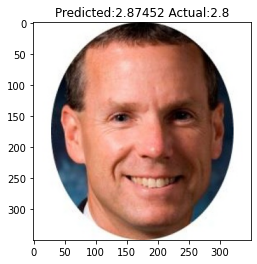

CF186.jpg


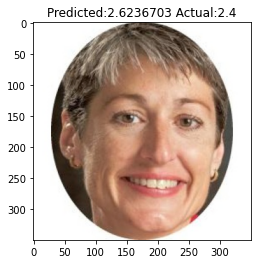

CM358.jpg


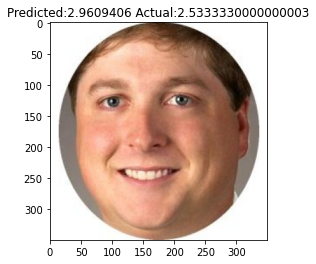

CF316.jpg


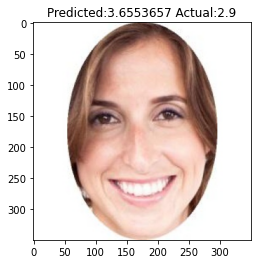

CF202.jpg


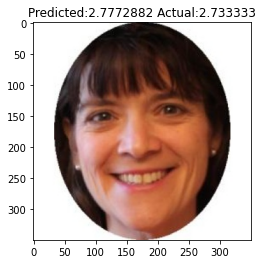

CF55.jpg


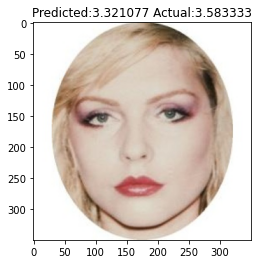

CF264.jpg


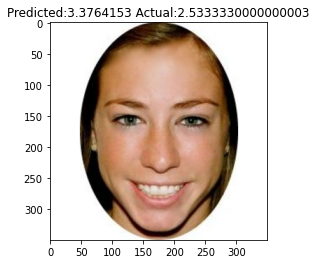

CM625.jpg


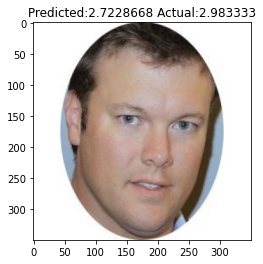

CF562.jpg


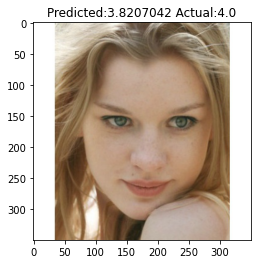

CF569.jpg


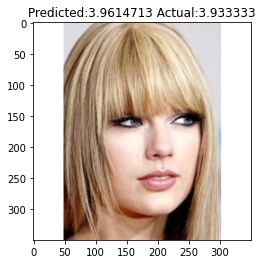

CF535.jpg


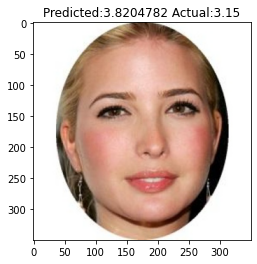

CF13.jpg


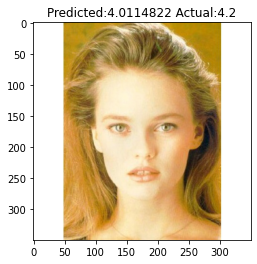

CM731.jpg


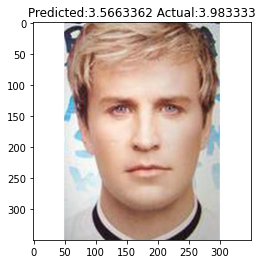

CF271.jpg


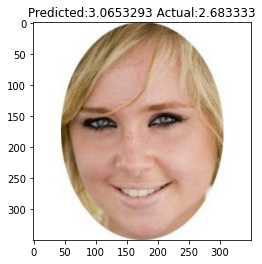

CF483.jpg


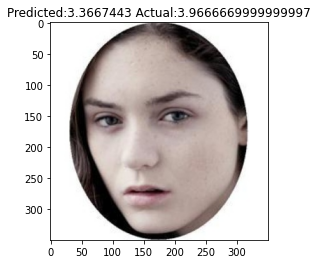

CM427.jpg


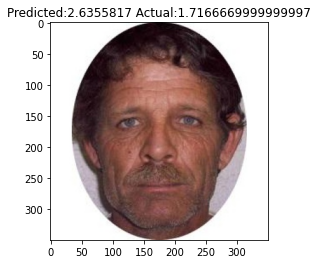

CF362.jpg


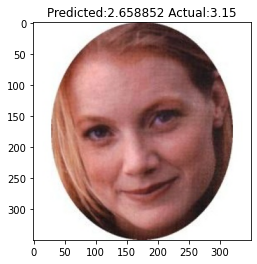

CM298.jpg


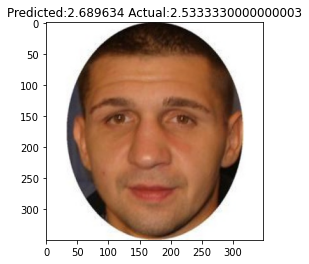

CM416.jpg


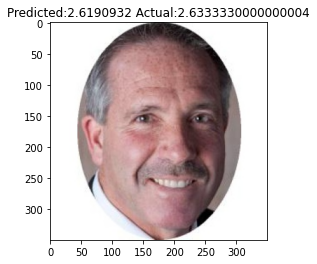

CF638.jpg


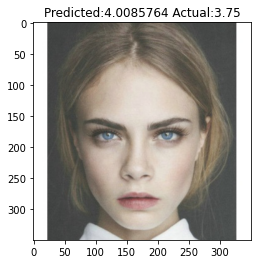

CF676.jpg


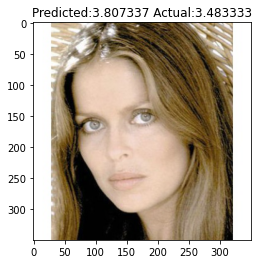

CF71.jpg


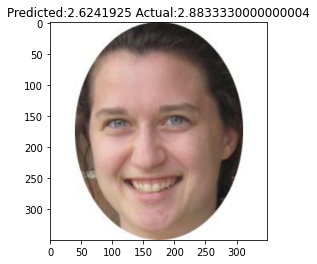

CM49.jpg


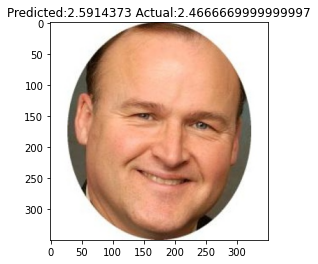

CM501.jpg


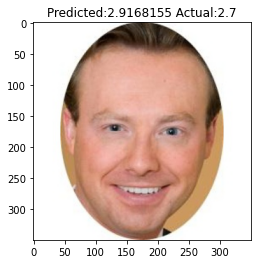

CM726.jpg


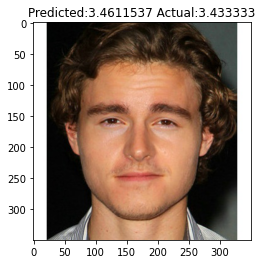

CF663.jpg


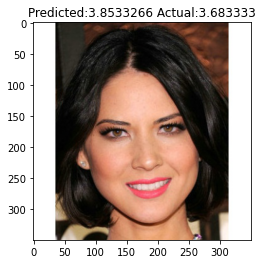

CF308.jpg


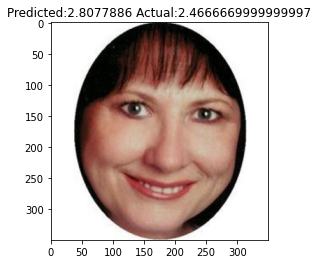

CM188.jpg


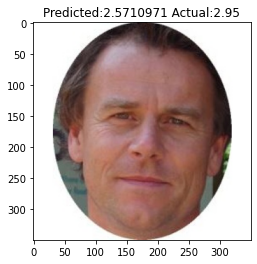

CM365.jpg


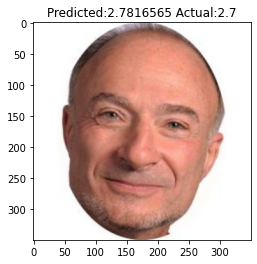

CM519.jpg


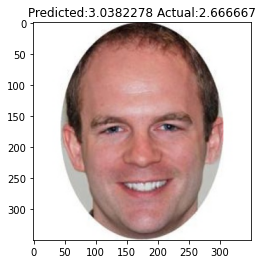

CF680.jpg


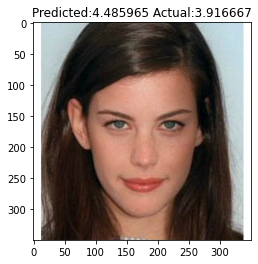

CM37.jpg


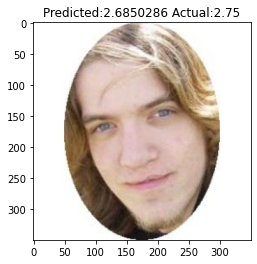

CM42.jpg


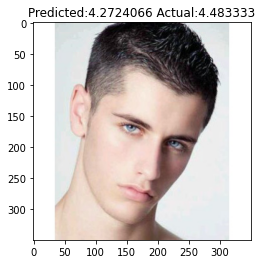

CM547.jpg


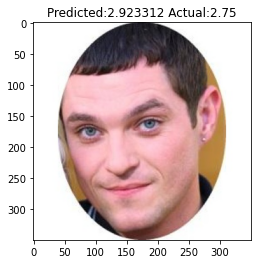

CM321.jpg


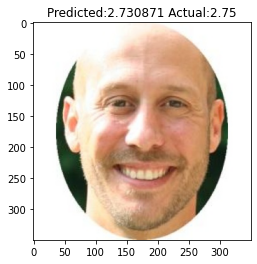

CM688.jpg


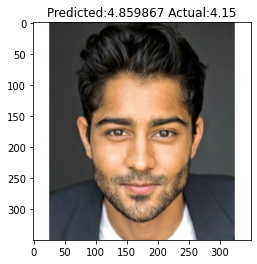

CF498.jpg


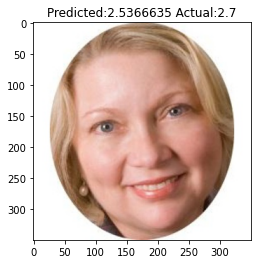

CF97.jpg


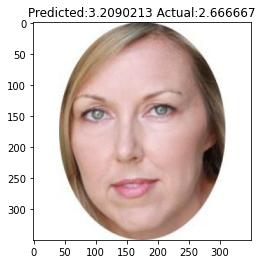

CM8.jpg


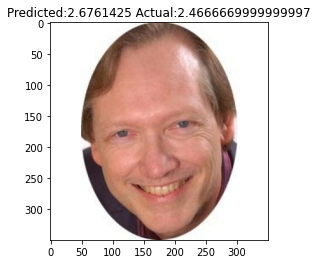

CM183.jpg


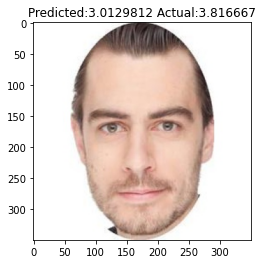

CF286.jpg


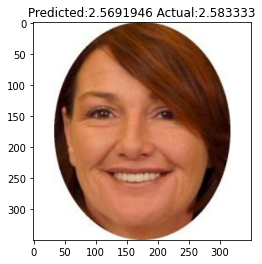

CM3.jpg


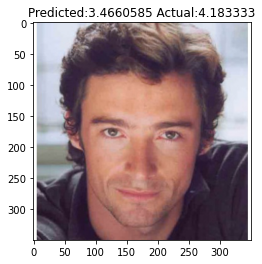

CM425.jpg


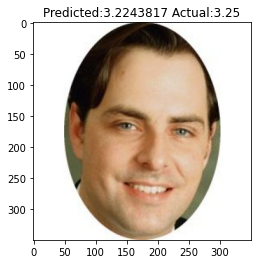

CF115.jpg


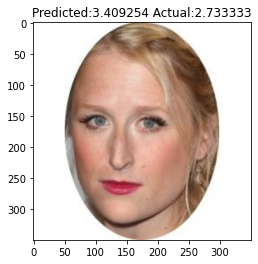

CM633.jpg


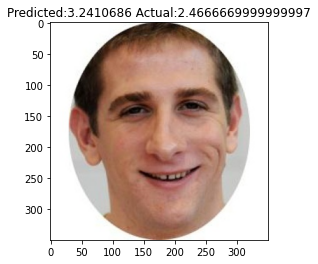

CM502.jpg


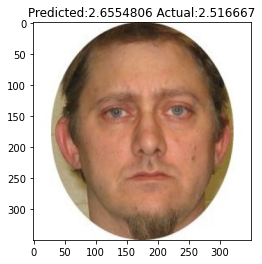

CM161.jpg


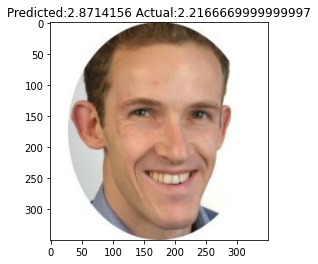

CF62.jpg


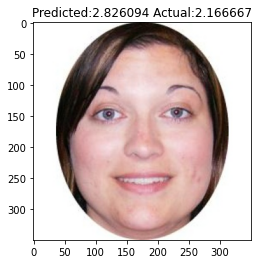

CF278.jpg


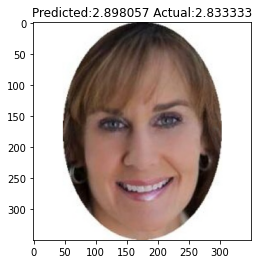

CF122.jpg


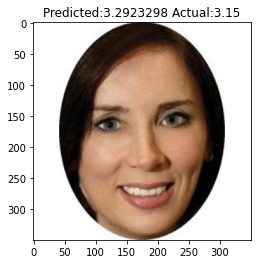

CF618.jpg


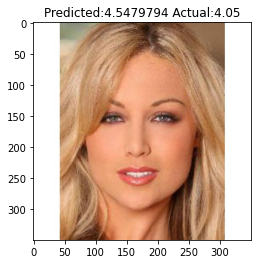

CF448.jpg


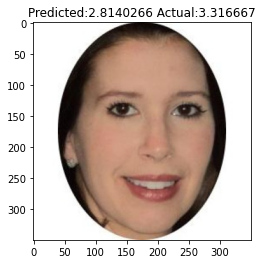

CF451.jpg


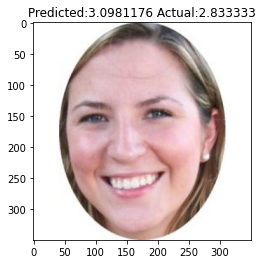

CF10.jpg


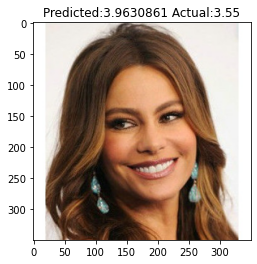

CM349.jpg


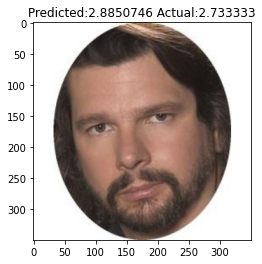

CM740.jpg


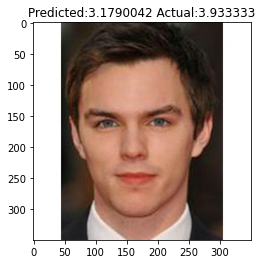

CM458.jpg


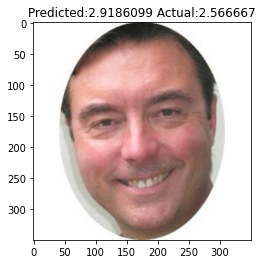

CF685.jpg


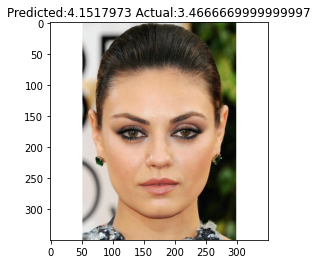

CM32.jpg


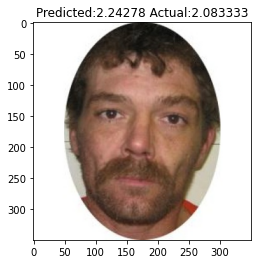

CM41.jpg


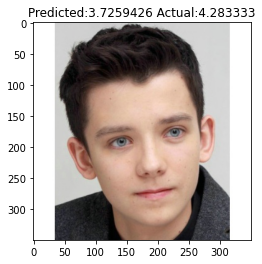

CF90.jpg


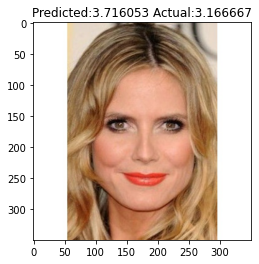

CM334.jpg


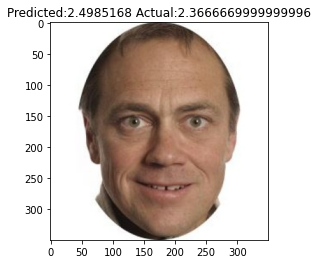

CM314.jpg


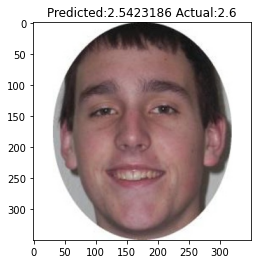

CM720.jpg


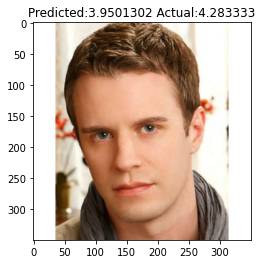

CM543.jpg


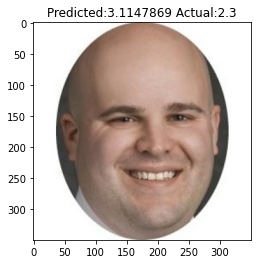

CM93.jpg


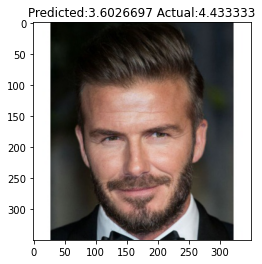

CM275.jpg


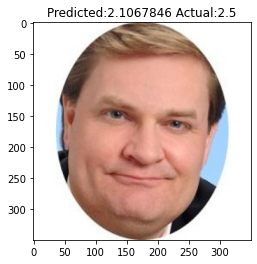

CM583.jpg


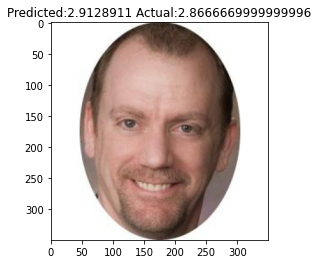

CM522.jpg


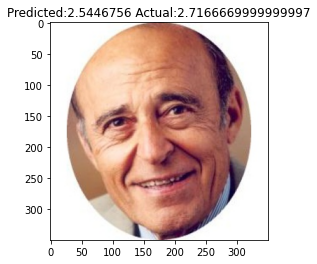

CF432.jpg


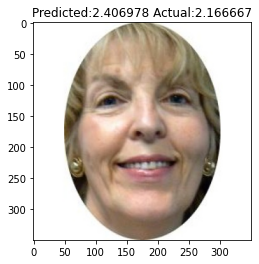

CM641.jpg


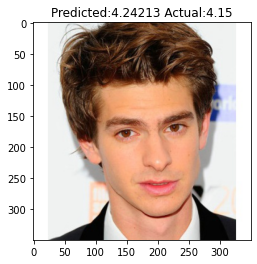

CM339.jpg


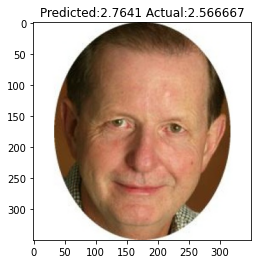

CF614.jpg


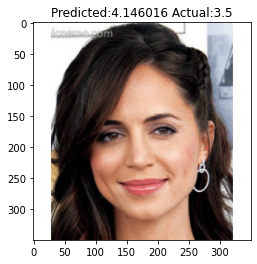

CM468.jpg


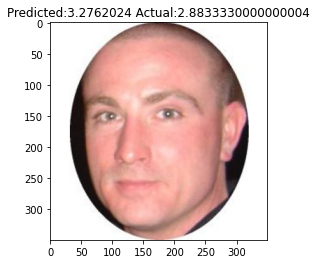

CF116.jpg


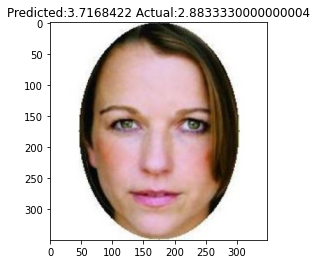

CF556.jpg


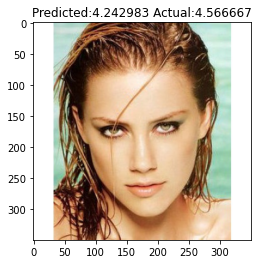

CM681.jpg


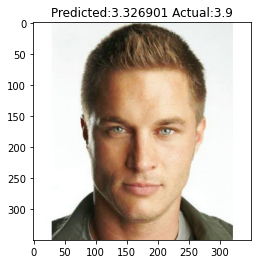

CM335.jpg


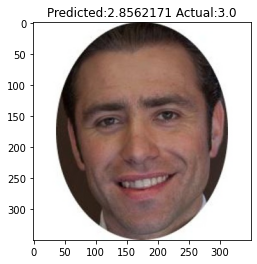

CM359.jpg


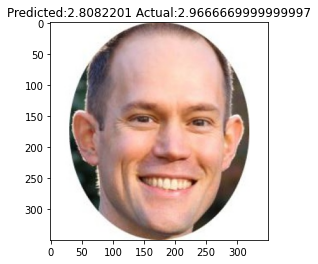

CF299.jpg


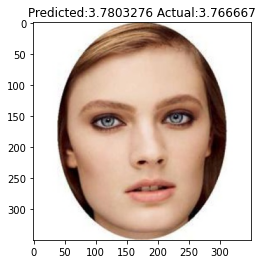

CM574.jpg


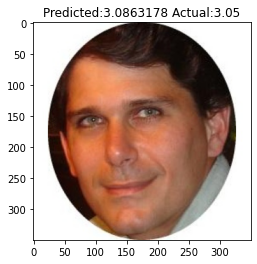

CM327.jpg


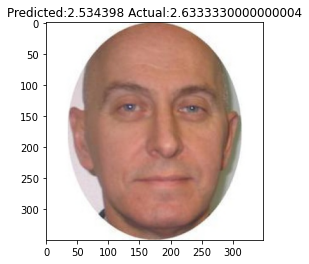

CF580.jpg


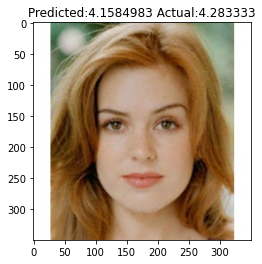

CF559.jpg


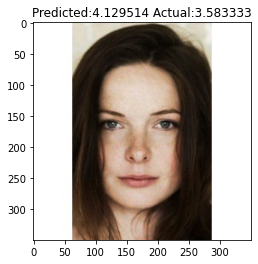

CM682.jpg


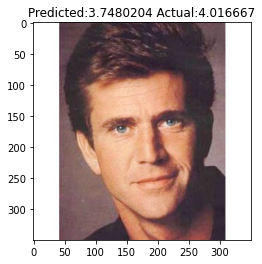

CF121.jpg


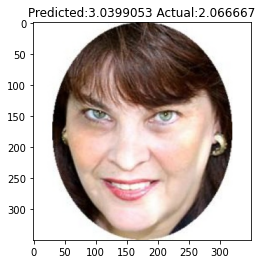

CM125.jpg


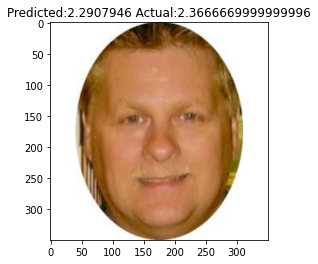

CF77.jpg


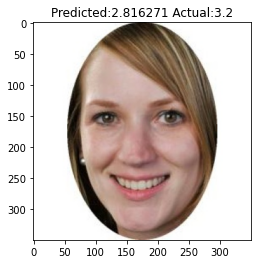

CF174.jpg


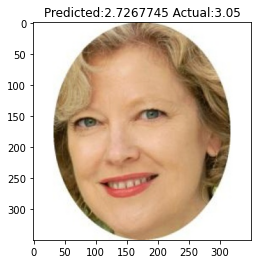

CF248.jpg


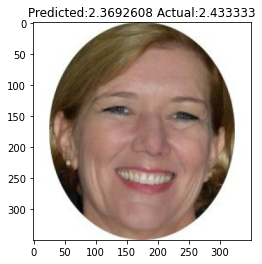

CM224.jpg


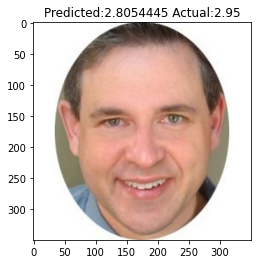

CF112.jpg


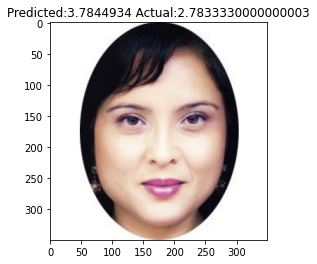

CF143.jpg


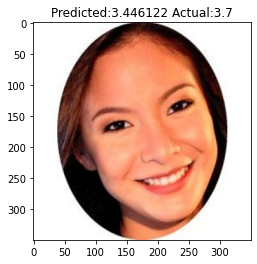

CM110.jpg


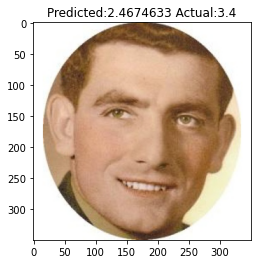

CM474.jpg


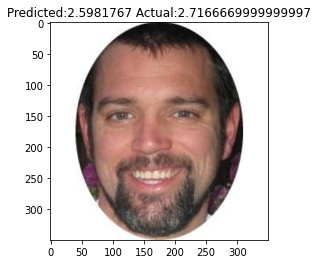

CM708.jpg


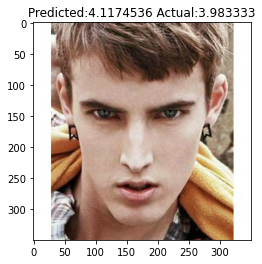

CF157.jpg


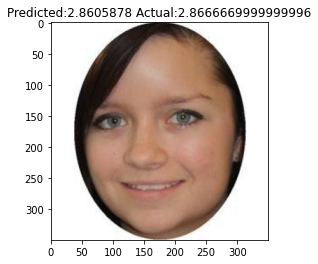

CF102.jpg


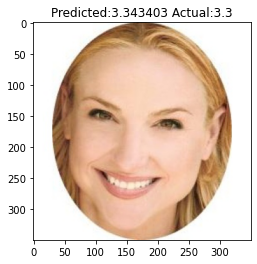

CM85.jpg


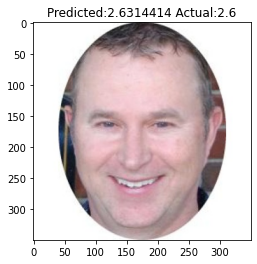

CM361.jpg


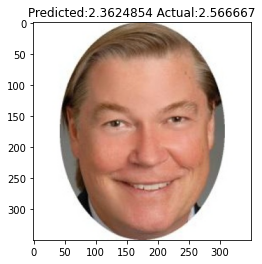

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for num in range(100):
    img_name = df.iloc[test_idx].iloc[num]["image"]
    print(img_name)
    path = "SCUT-FBP5500_v2/Images/%s" % (img_name)
    img=mpimg.imread(path)
    imgplot=plt.imshow(img)
    plt.title("Predicted:"+str(predictions[num][0])+" Actual:"+str(actuals[num]))
    plt.show()


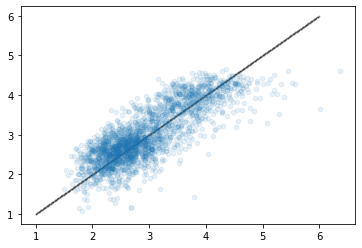

In [51]:
best_predictions = []
for i in np.arange(int(1), int(5) + 1, 0.01):
    best_predictions.append(round(i, 2))
 
plt.scatter(best_predictions, best_predictions, s=1, color = 'black', alpha=0.3)
plt.scatter(predictions, actuals, s=20, alpha=0.1)

In [66]:
predictions2 = list(predictions)

In [86]:
predictions2

[array([3.052527], dtype=float32),
 array([3.2138603], dtype=float32),
 array([3.0522811], dtype=float32),
 array([3.9253647], dtype=float32),
 array([2.3601775], dtype=float32),
 array([3.586646], dtype=float32),
 array([2.6330535], dtype=float32),
 array([4.589467], dtype=float32),
 array([2.4977987], dtype=float32),
 array([2.385557], dtype=float32),
 array([3.2057064], dtype=float32),
 array([2.5225136], dtype=float32),
 array([3.9359589], dtype=float32),
 array([2.3792353], dtype=float32),
 array([2.6342256], dtype=float32),
 array([2.4735837], dtype=float32),
 array([2.9348342], dtype=float32),
 array([2.4278026], dtype=float32),
 array([4.360353], dtype=float32),
 array([3.3578584], dtype=float32),
 array([2.3321154], dtype=float32),
 array([2.6798613], dtype=float32),
 array([2.3704994], dtype=float32),
 array([3.0233128], dtype=float32),
 array([2.1168816], dtype=float32),
 array([3.8074827], dtype=float32),
 array([3.4613488], dtype=float32),
 array([4.0125318], dtype=float32

In [90]:
#np.array([1,2,1,2])[[1,2]]